In [1]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
pd.set_option("display.max_columns", 200)


In [2]:
regions = [
    "London", "South East", "South West", "East of England",
    "West Midlands", "East Midlands", "North West", "North East", "Yorkshire & Humber"
]

cities_by_region = {
    "London": ["London"],
    "South East": ["Brighton", "Reading", "Oxford", "Canterbury", "Portsmouth", "Milton Keynes"],
    "South West": ["Bristol", "Bath", "Exeter", "Plymouth", "Bournemouth"],
    "East of England": ["Cambridge", "Norwich", "Ipswich", "Chelmsford"],
    "West Midlands": ["Birmingham", "Coventry", "Wolverhampton"],
    "East Midlands": ["Nottingham", "Leicester", "Derby", "Lincoln"],
    "North West": ["Manchester", "Liverpool", "Preston", "Lancaster"],
    "North East": ["Newcastle", "Sunderland", "Middlesbrough"],
    "Yorkshire & Humber": ["Leeds", "Sheffield", "York", "Hull"]
}


In [3]:
companies = [
    "Waterstones",
    "WHSmith (High Street)",
    "Independent Bookshop",
    "University Bookshop",
    "Supermarket Books"
]


In [4]:
footprint = {
    "Waterstones": {
        "London": 10, "South East": 7, "South West": 6, "East of England": 5,
        "West Midlands": 5, "East Midlands": 4, "North West": 6, "North East": 3, "Yorkshire & Humber": 5
    },
    "WHSmith (High Street)": {
        "London": 8, "South East": 7, "South West": 6, "East of England": 5,
        "West Midlands": 5, "East Midlands": 4, "North West": 6, "North East": 4, "Yorkshire & Humber": 5
    },
    "Independent Bookshop": {
        "London": 6, "South East": 6, "South West": 6, "East of England": 5,
        "West Midlands": 4, "East Midlands": 4, "North West": 5, "North East": 3, "Yorkshire & Humber": 4
    },
    "University Bookshop": {
        "London": 2, "South East": 3, "South West": 2, "East of England": 4,
        "West Midlands": 2, "East Midlands": 3, "North West": 2, "North East": 2, "Yorkshire & Humber": 3
    },
    "Supermarket Books": {
        "London": 3, "South East": 4, "South West": 4, "East of England": 4,
        "West Midlands": 4, "East Midlands": 4, "North West": 5, "North East": 4, "Yorkshire & Humber": 4
    }
}


In [5]:
format_choices = ["Small", "Medium", "Large"]
format_probs = [0.45, 0.40, 0.15]

def make_stores():
    rows = []
    sid = 1

    for company in companies:
        for region in regions:
            intensity = footprint[company][region]

            # translate "intensity" into a store count with randomness
            n_stores = max(1, int(rng.poisson(lam=intensity/2) + 1))

            for _ in range(n_stores):
                city = rng.choice(cities_by_region[region])
                rows.append({
                    "store_id": f"S{sid:04d}",
                    "company": company,
                    "region": region,
                    "city": city,
                    "store_format": rng.choice(format_choices, p=format_probs)
                })
                sid += 1

    return pd.DataFrame(rows)

stores = make_stores()
stores.head()


,store_id,company,region,city,store_format
0,S0001,Waterstones,London,London,Medium
1,S0002,Waterstones,London,London,Small
2,S0003,Waterstones,London,London,Large
3,S0004,Waterstones,London,London,Medium
4,S0005,Waterstones,London,London,Medium


In [6]:
stores["company"].value_counts()


company
WHSmith (High Street)    42
Waterstones              39
Supermarket Books        33
Independent Bookshop     30
University Bookshop      18
Name: count, dtype: int64

In [7]:
catalog = pd.DataFrame([
    {"isbn": "CB-001", "title": "Books of Blood (Vol. 1)", "format": "Paperback", "list_price": 9.99, "publisher_cost": 4.20},
    {"isbn": "CB-002", "title": "Books of Blood (Vol. 2)", "format": "Paperback", "list_price": 9.99, "publisher_cost": 4.20},
    {"isbn": "CB-003", "title": "The Hellbound Heart", "format": "Paperback", "list_price": 8.99, "publisher_cost": 3.80},
    {"isbn": "CB-004", "title": "Weaveworld", "format": "Paperback", "list_price": 10.99, "publisher_cost": 4.60},
    {"isbn": "CB-005", "title": "Imajica", "format": "Paperback", "list_price": 12.99, "publisher_cost": 5.50},
    {"isbn": "CB-006", "title": "The Great and Secret Show", "format": "Paperback", "list_price": 11.99, "publisher_cost": 5.10},
    {"isbn": "CB-007", "title": "Cabal", "format": "Paperback", "list_price": 8.99, "publisher_cost": 3.80},
    {"isbn": "CB-008", "title": "Abarat", "format": "Hardback", "list_price": 16.99, "publisher_cost": 8.40},
])

catalog["gross_margin_per_unit"] = catalog["list_price"] - catalog["publisher_cost"]
catalog


,isbn,title,format,list_price,publisher_cost,gross_margin_per_unit
0,CB-001,Books of Blood (Vol. 1),Paperback,9.99,4.2,5.79
1,CB-002,Books of Blood (Vol. 2),Paperback,9.99,4.2,5.79
2,CB-003,The Hellbound Heart,Paperback,8.99,3.8,5.19
3,CB-004,Weaveworld,Paperback,10.99,4.6,6.39
4,CB-005,Imajica,Paperback,12.99,5.5,7.49
5,CB-006,The Great and Secret Show,Paperback,11.99,5.1,6.89
6,CB-007,Cabal,Paperback,8.99,3.8,5.19
7,CB-008,Abarat,Hardback,16.99,8.4,8.59


In [8]:
demo_segments = ["Age 16–24", "Age 25–34", "Age 35–44", "Age 45–54", "Age 55–64", "Age 65+"]


In [9]:
company_profile = {
    "Waterstones": {
        "avg_discount": 0.08,
        "base_footfall": 2200,
        "conversion_rate": 0.032,
        "op_cost_weekly": 18500,
        "demographics_dirichlet": np.array([5.0, 7.0, 6.0, 3.5, 2.0, 2.0])
    },
    "WHSmith (High Street)": {
        "avg_discount": 0.12,
        "base_footfall": 2600,
        "conversion_rate": 0.018,
        "op_cost_weekly": 14500,
        "demographics_dirichlet": np.array([6.5, 5.5, 4.5, 2.5, 1.5, 1.5])
    },
    "Independent Bookshop": {
        "avg_discount": 0.05,
        "base_footfall": 900,
        "conversion_rate": 0.040,
        "op_cost_weekly": 6200,
        "demographics_dirichlet": np.array([3.5, 6.0, 6.5, 4.0, 2.0, 1.5])
    },
    "University Bookshop": {
        "avg_discount": 0.10,
        "base_footfall": 1100,
        "conversion_rate": 0.028,
        "op_cost_weekly": 7200,
        "demographics_dirichlet": np.array([2.5, 8.0, 4.5, 2.5, 1.2, 0.8])
    },
    "Supermarket Books": {
        "avg_discount": 0.18,
        "base_footfall": 4800,
        "conversion_rate": 0.010,
        "op_cost_weekly": 9800,
        "demographics_dirichlet": np.array([7.5, 4.5, 3.0, 1.8, 1.2, 1.0])
    }
}


In [10]:
region_demand_multiplier = {
    "London": 1.25,
    "South East": 1.10,
    "South West": 1.00,
    "East of England": 1.05,
    "West Midlands": 1.00,
    "East Midlands": 0.95,
    "North West": 1.05,
    "North East": 0.90,
    "Yorkshire & Humber": 0.98
}

format_size_multiplier = {"Small": 0.80, "Medium": 1.00, "Large": 1.35}


In [11]:
N_WEEKS = 52
weeks = pd.date_range("2025-01-06", periods=N_WEEKS, freq="W-MON")

def seasonal_multiplier(week_index: int) -> float:
    # Halloween: weeks ~40–44, Christmas: weeks ~48–51
    if 40 <= week_index <= 44:
        return 1.30
    if 48 <= week_index <= 51:
        return 1.15
    return 1.00

weeks[:5], weeks[-5:]


(DatetimeIndex(['2025-01-06', '2025-01-13', '2025-01-20', '2025-01-27',
                '2025-02-03'],
               dtype='datetime64[ns]', freq='W-MON'),
 DatetimeIndex(['2025-12-01', '2025-12-08', '2025-12-15', '2025-12-22',
                '2025-12-29'],
               dtype='datetime64[ns]', freq='W-MON'))

In [12]:
popularity = np.array([0.18, 0.14, 0.22, 0.12, 0.10, 0.09, 0.10, 0.05])
popularity = popularity / popularity.sum()

rows = []

for w_i, w in enumerate(weeks):
    season = seasonal_multiplier(w_i)

    for _, s in stores.iterrows():
        prof = company_profile[s["company"]]
        reg_mult = region_demand_multiplier[s["region"]]
        size_mult = format_size_multiplier[s["store_format"]]

        # Footfall varies week to week
        footfall = max(
            50,
            int(rng.normal(loc=prof["base_footfall"] * size_mult,
                           scale=prof["base_footfall"] * 0.08))
        )

        # Buyers = people who buy a Clive Barker book
        buyers_mean = footfall * prof["conversion_rate"] * reg_mult * season
        buyers = int(rng.poisson(lam=max(0.1, buyers_mean)))

        # allocate buyers into titles
        units_by_title = rng.multinomial(n=buyers, pvals=popularity)

        # demographics mix per store-week
        demo_share = rng.dirichlet(prof["demographics_dirichlet"])

        for i, b in catalog.iterrows():
            units = int(units_by_title[i])
            if units == 0:
                continue

            discount = float(np.clip(rng.normal(loc=prof["avg_discount"], scale=0.03), 0.0, 0.35))
            sell_price = b["list_price"] * (1 - discount)

            revenue = units * sell_price
            cogs = units * b["publisher_cost"]
            gross_profit = revenue - cogs

            rows.append({
                "week_start": w.date(),
                "store_id": s["store_id"],
                "company": s["company"],
                "region": s["region"],
                "city": s["city"],
                "store_format": s["store_format"],
                "isbn": b["isbn"],
                "title": b["title"],
                "format": b["format"],
                "units_sold": units,
                "avg_discount": discount,
                "avg_sell_price": sell_price,
                "revenue": revenue,
                "cogs": cogs,
                "gross_profit": gross_profit,
                "footfall": footfall,
                **{f"demo_share_{demo_segments[j]}": float(demo_share[j]) for j in range(len(demo_segments))}
            })

sales = pd.DataFrame(rows)
sales.head()


,week_start,store_id,company,region,city,store_format,isbn,title,format,units_sold,avg_discount,avg_sell_price,revenue,cogs,gross_profit,footfall,demo_share_Age 16–24,demo_share_Age 25–34,demo_share_Age 35–44,demo_share_Age 45–54,demo_share_Age 55–64,demo_share_Age 65+
0,2025-01-06,S0001,Waterstones,London,London,Medium,CB-001,Books of Blood (Vol. 1),Paperback,19,0.068188,9.308804,176.867280,79.8,97.067280,2430,0.190259,0.315087,0.238651,0.142834,0.036279,0.076891
1,2025-01-06,S0001,Waterstones,London,London,Medium,CB-002,Books of Blood (Vol. 2),Paperback,15,0.095635,9.034606,135.519093,63.0,72.519093,2430,0.190259,0.315087,0.238651,0.142834,0.036279,0.076891
2,2025-01-06,S0001,Waterstones,London,London,Medium,CB-003,The Hellbound Heart,Paperback,22,0.072025,8.342497,183.534928,83.6,99.934928,2430,0.190259,0.315087,0.238651,0.142834,0.036279,0.076891
3,2025-01-06,S0001,Waterstones,London,London,Medium,CB-004,Weaveworld,Paperback,18,0.076474,10.149554,182.691966,82.8,99.891966,2430,0.190259,0.315087,0.238651,0.142834,0.036279,0.076891
4,2025-01-06,S0001,Waterstones,London,London,Medium,CB-005,Imajica,Paperback,12,0.104886,11.627536,139.530437,66.0,73.530437,2430,0.190259,0.315087,0.238651,0.142834,0.036279,0.076891


In [13]:
sales.shape


(65690, 22)

In [14]:
store_week_totals = (
    sales.groupby(["week_start", "store_id"], as_index=False)
         .agg(
             week_revenue=("revenue", "sum"),
             week_gross_profit=("gross_profit", "sum"),
             company=("company", "first"),
             region=("region", "first"),
             city=("city", "first"),
             store_format=("store_format", "first"),
             footfall=("footfall", "first")
         )
)

store_week_totals.head()


,week_start,store_id,week_revenue,week_gross_profit,company,region,city,store_format,footfall
0,2025-01-06,S0001,1108.853943,592.953943,Waterstones,London,London,Medium,2430
1,2025-01-06,S0002,366.742366,200.542366,Waterstones,London,London,Small,1349
2,2025-01-06,S0003,1109.976971,606.076971,Waterstones,London,London,Large,2781
3,2025-01-06,S0004,893.943875,475.643875,Waterstones,London,London,Medium,2540
4,2025-01-06,S0005,796.420015,427.520015,Waterstones,London,London,Medium,2140


In [15]:
size_cost_multiplier = {"Small": 0.85, "Medium": 1.00, "Large": 1.25}

def op_cost_for_store_week(row):
    base = company_profile[row["company"]]["op_cost_weekly"]
    return base * size_cost_multiplier[row["store_format"]]

store_week_totals["op_cost_weekly"] = store_week_totals.apply(op_cost_for_store_week, axis=1)
store_week_totals["net_profit"] = store_week_totals["week_gross_profit"] - store_week_totals["op_cost_weekly"]

store_week_totals.head()


,week_start,store_id,week_revenue,week_gross_profit,company,region,city,store_format,footfall,op_cost_weekly,net_profit
0,2025-01-06,S0001,1108.853943,592.953943,Waterstones,London,London,Medium,2430,18500.0,-17907.046057
1,2025-01-06,S0002,366.742366,200.542366,Waterstones,London,London,Small,1349,15725.0,-15524.457634
2,2025-01-06,S0003,1109.976971,606.076971,Waterstones,London,London,Large,2781,23125.0,-22518.923029
3,2025-01-06,S0004,893.943875,475.643875,Waterstones,London,London,Medium,2540,18500.0,-18024.356125
4,2025-01-06,S0005,796.420015,427.520015,Waterstones,London,London,Medium,2140,18500.0,-18072.479985


In [16]:
company_summary = (
    store_week_totals.groupby("company", as_index=False)
    .agg(
        avg_weekly_revenue=("week_revenue", "mean"),
        avg_weekly_gross_profit=("week_gross_profit", "mean"),
        avg_weekly_op_cost=("op_cost_weekly", "mean"),
        avg_weekly_net_profit=("net_profit", "mean"),
        median_weekly_net_profit=("net_profit", "median"),
        store_weeks=("net_profit", "size")
    )
)

company_summary["annualized_revenue_per_store"] = company_summary["avg_weekly_revenue"] * 52
company_summary["annualized_net_profit_per_store"] = company_summary["avg_weekly_net_profit"] * 52

company_summary.sort_values("annualized_net_profit_per_store", ascending=False)


,company,avg_weekly_revenue,avg_weekly_gross_profit,avg_weekly_op_cost,avg_weekly_net_profit,median_weekly_net_profit,store_weeks,annualized_revenue_per_store,annualized_net_profit_per_store
0,Independent Bookshop,360.989089,198.420500,5859.000000,-5660.579500,-5156.444958,1560,18771.432650,-294350.134017
2,University Bookshop,287.122557,150.629502,6940.000000,-6789.370498,-6021.289116,936,14930.372967,-353047.265922
1,Supermarket Books,437.045373,209.205338,9710.909091,-9501.703752,-9572.225116,1716,22726.359417,-494088.595129
3,WHSmith (High Street),461.096324,237.031352,14172.023810,-13934.992458,-14212.148902,2184,23977.008860,-724619.607807
4,Waterstones,721.189531,386.105162,17669.871795,-17283.766633,-18034.210853,2028,37501.855592,-898755.864921


In [17]:
company_region = (
    store_week_totals.groupby(["company", "region"], as_index=False)
    .agg(
        avg_weekly_net_profit=("net_profit", "mean"),
        avg_weekly_revenue=("week_revenue", "mean"),
        avg_weekly_gross_profit=("week_gross_profit", "mean"),
        store_weeks=("net_profit", "size")
    )
)

best_by_region = (
    company_region.sort_values(["region", "avg_weekly_net_profit"], ascending=[True, False])
                 .groupby("region", as_index=False)
                 .head(1)
)

best_by_region


,company,region,avg_weekly_net_profit,avg_weekly_revenue,avg_weekly_gross_profit,store_weeks
0,Independent Bookshop,East Midlands,-5805.769917,340.988096,187.563417,312
1,Independent Bookshop,East of England,-5097.218953,314.482329,172.781047,156
20,University Bookshop,London,-5953.776370,316.489014,166.223630,52
3,Independent Bookshop,North East,-5567.840034,304.071504,167.159966,104
4,Independent Bookshop,North West,-6130.584266,408.165734,224.415734,208
5,Independent Bookshop,South East,-5082.174362,341.673715,187.825638,52
6,Independent Bookshop,South West,-5992.713490,377.799972,207.286510,156
7,Independent Bookshop,West Midlands,-5324.291325,324.177425,178.208675,208
8,Independent Bookshop,Yorkshire & Humber,-5106.478462,296.949743,163.521538,156


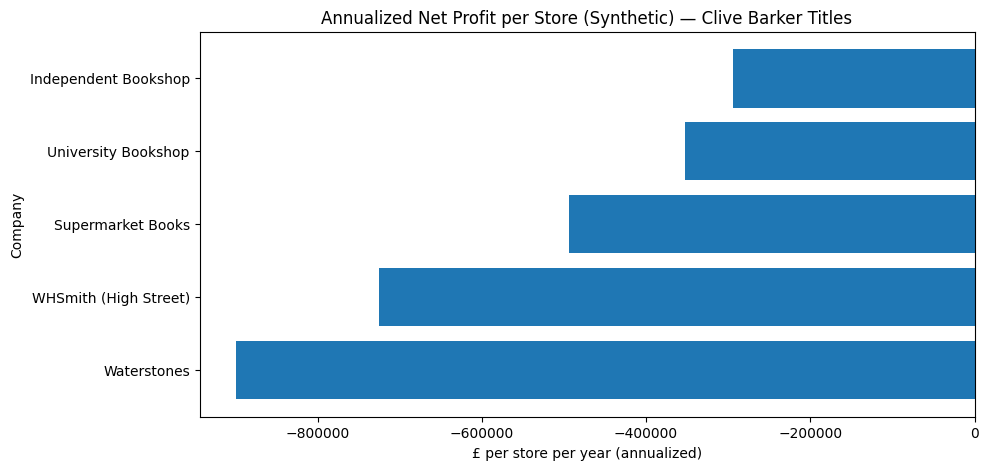

In [18]:
import matplotlib.pyplot as plt

plot_df = company_summary.sort_values("annualized_net_profit_per_store", ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(plot_df["company"], plot_df["annualized_net_profit_per_store"])
plt.title("Annualized Net Profit per Store (Synthetic) — Clive Barker Titles")
plt.xlabel("£ per store per year (annualized)")
plt.ylabel("Company")
plt.show()


In [24]:
# Save all DataFrames to CSV files

# Stores
stores.to_csv("england_stores23.csv", index=False)

# Catalog
catalog.to_csv("clive_barker_catalog.csv", index=False)

# Sales
sales.to_csv("clive_barker_sales_store_week_title.csv", index=False)

# Store weekly totals
store_week_totals.to_csv("store_weeks_profit.csv", index=False)

# Company summary
company_summary.to_csv("company_profits_summary.csv", index=False)

# Company demographic summary
# Only save if it exists to avoid NameError
try:
    demo_company.to_csv("company_demographic_summary.csv", index=False)
except NameError:
    print("Warning: demo_company DataFrame is not defined. Skipping demographic summary export.")

print("Saved CSVs to the current notebook folder.")


Saved CSVs to the current notebook folder.
